#### Libraries

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [75]:
df=pd.read_csv('employee.csv')
df_copy=df

#### Data Cleaning

In [76]:
#Check Missing Values
df.isnull().sum()

id                    0
name                  0
position              0
salary                0
age                   0
department            0
education_level       0
years_at_company      0
work_life_balance     0
job_satisfaction      0
performance_rating    0
left_company          0
dtype: int64

In [77]:
# Remove Duplicates
df=df.drop_duplicates()

In [78]:
#Verify the datatypes
df.dtypes

id                     int64
name                  object
position              object
salary                 int64
age                    int64
department            object
education_level       object
years_at_company       int64
work_life_balance      int64
job_satisfaction       int64
performance_rating     int64
left_company           int64
dtype: object

What are Outliers?
Outliers are values that are unusually high or low compared to the rest of the data. 

Visualize to Detect Outliers
1) Use Boxplot ( This will show you if there are any extreme values)

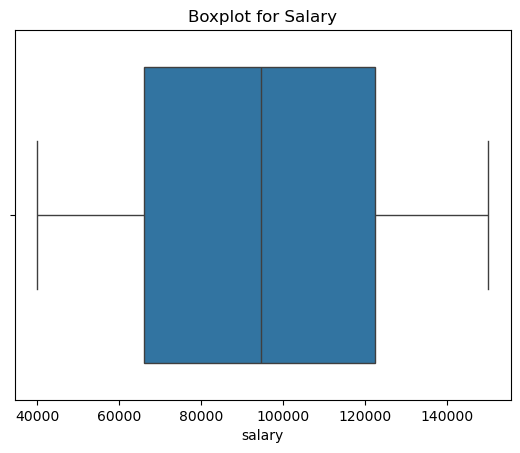

In [79]:
sns.boxplot(x=df['salary'])
plt.title('Boxplot for Salary')
plt.show()

Use IQR Method (Interquartile Range)

This is a common method to find outliers in numerical data.



In [80]:
Q1=df['salary'].quantile(0.25)
Q3=df['salary'].quantile(0.75)
IQR= Q3-Q1

#Define bounds
lower_bound= Q1-1.5*IQR
upper_bound=Q3+1.5*IQR 



Convert Salary Column to Numeric

In [81]:
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')


Outlier Check Safety

In [82]:
df = df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]


In [83]:
df.shape

(10000, 12)

#### Exploratory Data Analysis - Perform initial analysis to understand patterns in the data.

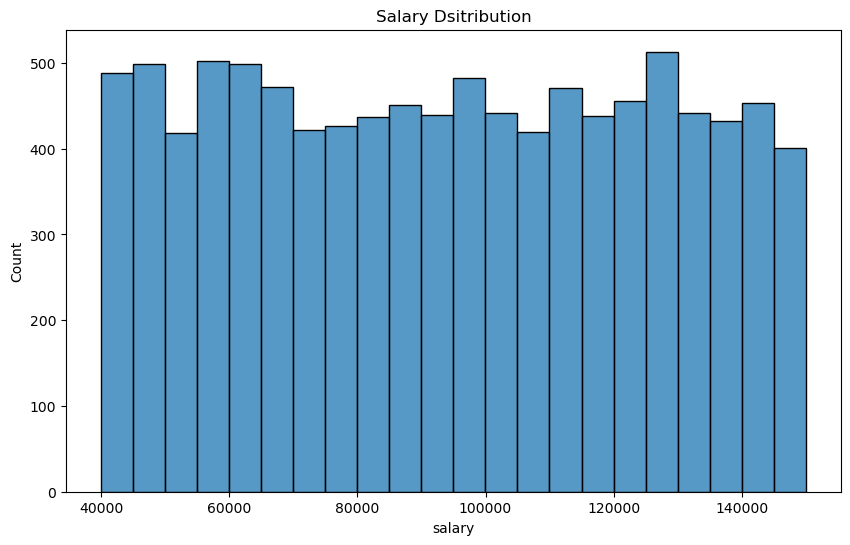

In [84]:
#Visualize Salary Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['salary'])
plt.title('Salary Dsitribution')
plt.show()

                          id    salary       age  years_at_company  \
id                  1.000000 -0.006803  0.000675         -0.004529   
salary             -0.006803  1.000000  0.011337          0.002377   
age                 0.000675  0.011337  1.000000         -0.000989   
years_at_company   -0.004529  0.002377 -0.000989          1.000000   
work_life_balance  -0.000661 -0.006243 -0.008362         -0.011219   
job_satisfaction   -0.001458  0.010369 -0.001078         -0.007287   
performance_rating -0.003401 -0.000851  0.005768         -0.010171   
left_company        0.005866 -0.002026 -0.000710          0.001549   

                    work_life_balance  job_satisfaction  performance_rating  \
id                          -0.000661         -0.001458           -0.003401   
salary                      -0.006243          0.010369           -0.000851   
age                         -0.008362         -0.001078            0.005768   
years_at_company            -0.011219         -0.0072

<Axes: >

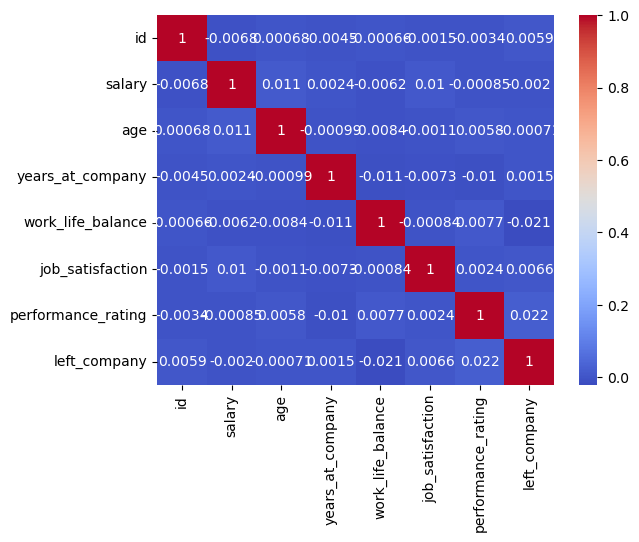

In [85]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

#### Feature Engineering - Transform raw data into features that can be used in models

In [86]:
#Create a Salary Band
df1=df
df['salary_band']=pd.cut(df['salary'],bins=[0,30000,60000,90000,120000,float('inf')],labels=['Low', 'Medium', 'High', 'Very High', 'Top'])

Handling Categorical Data:

Data Transformation - Log transformations for highly skewed data.

Standardization (e.g., for salary data) to bring all numerical data to the same scale.

Log Transformation - 
When to Apply Log Transformation:
When the distribution is right-skewed (positive skew).

When there are outliers or extreme values that are causing the data to be skewed.

In [87]:
# Standarization of Salary Data
scaler = StandardScaler()
df['Standarized_Salary']=scaler.fit_transform(df[['salary']])

In [88]:
df['Standarized_Salary']

0       0.635850
1      -1.439626
2      -0.973187
3      -1.269652
4       1.310063
          ...   
9995   -0.514283
9996   -1.656912
9997    1.505561
9998   -0.206892
9999   -0.407633
Name: Standarized_Salary, Length: 10000, dtype: float64

Data Validation:
Objective: Ensure that your cleaned data is ready for the next step (whether analysis or machine learning).

Tasks:

Validate the data: Check again for any outliers or invalid data points that could skew results.

Cross-check data transformations to make sure they were applied correctly.

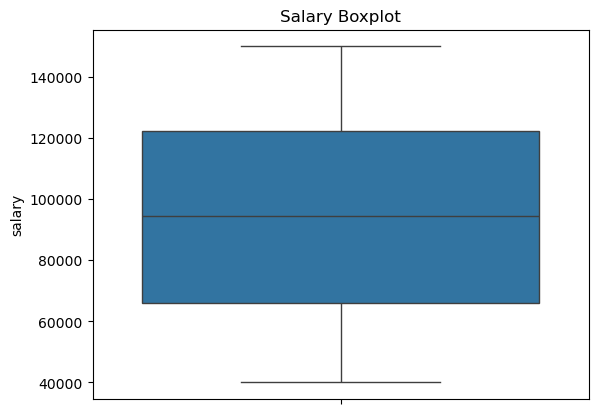

In [89]:
sns.boxplot(df['salary'])
plt.title("Salary Boxplot")
plt.show()

Preparing for Modeling:
Objective: Prepare your cleaned and processed dataset for any further modeling or analysis.

Tasks:

Split the data into train and test sets if you’re going to build a model.

If you’re not modeling yet, prepare the data in the required format for the next steps.

In [90]:
# Assuming you're predicting salary based on other features
X=df1.drop(columns=df1['salary'],errors='ignore')
y= df1['salary']

#split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(8000, 14)
(2000, 14)


#### Visualizations for Analysis

##### Employee Count per Position 

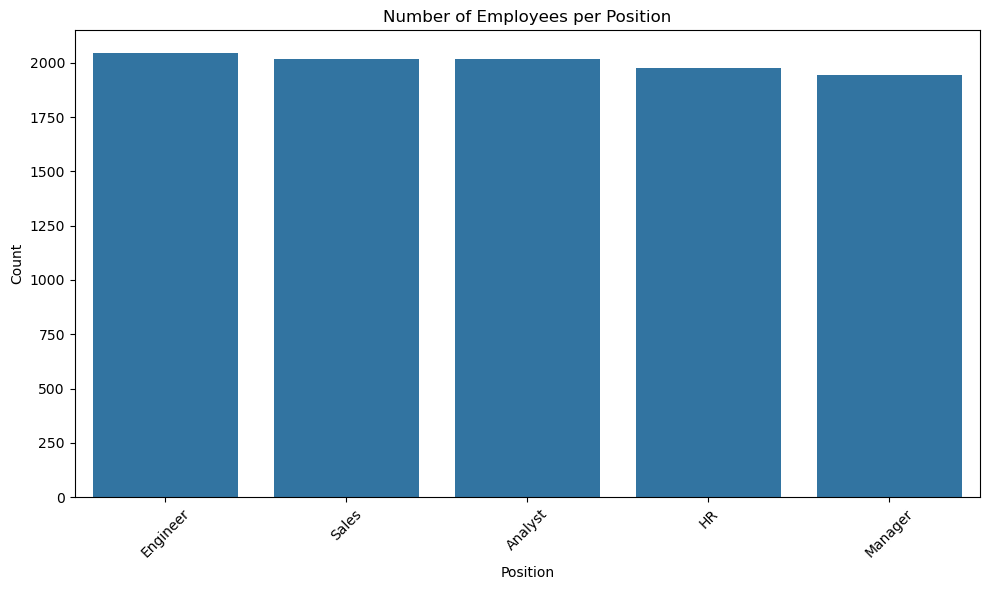

In [91]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_copy,x='position',order=df_copy['position'].value_counts().index) 
plt.title('Number of Employees per Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Salary vs Years at Company 

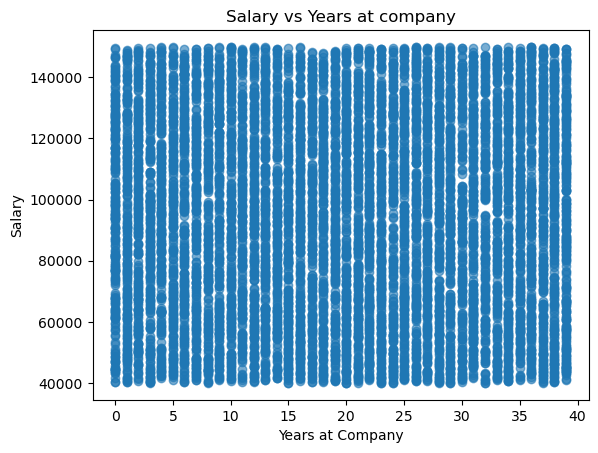

In [92]:
plt.scatter(df['years_at_company'],df['salary'],alpha=0.6)
plt.title('Salary vs Years at company')
plt.xlabel('Years at Company')
plt.ylabel('Salary')
plt.show()

#### Performance Rating by Work-Life Balance

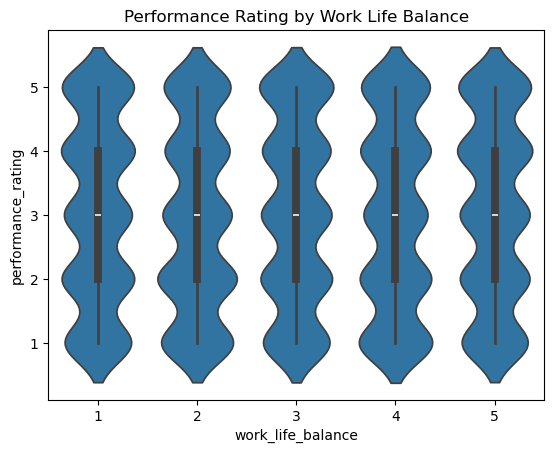

In [93]:
sns.violinplot(x='work_life_balance',y='performance_rating',data=df)
plt.title('Performance Rating by Work Life Balance')
plt.show()

### Age Distribution

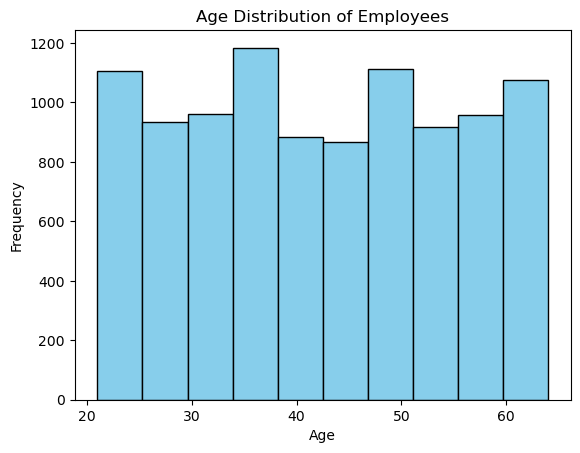

In [94]:
df['age'].plot.hist(bins=10,color='skyblue',edgecolor='black')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.show()


#### Job Satisfaction by Department

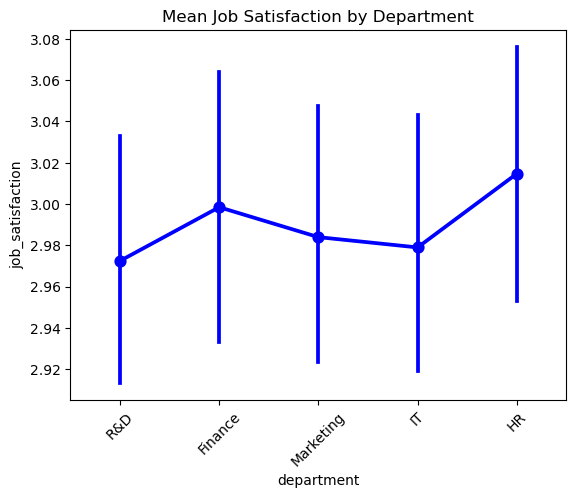

In [95]:
sns.pointplot(x='department', y='job_satisfaction', data=df, color='blue')
plt.title('Mean Job Satisfaction by Department')
plt.xticks(rotation=45)
plt.show()


 #### Turnover by Department

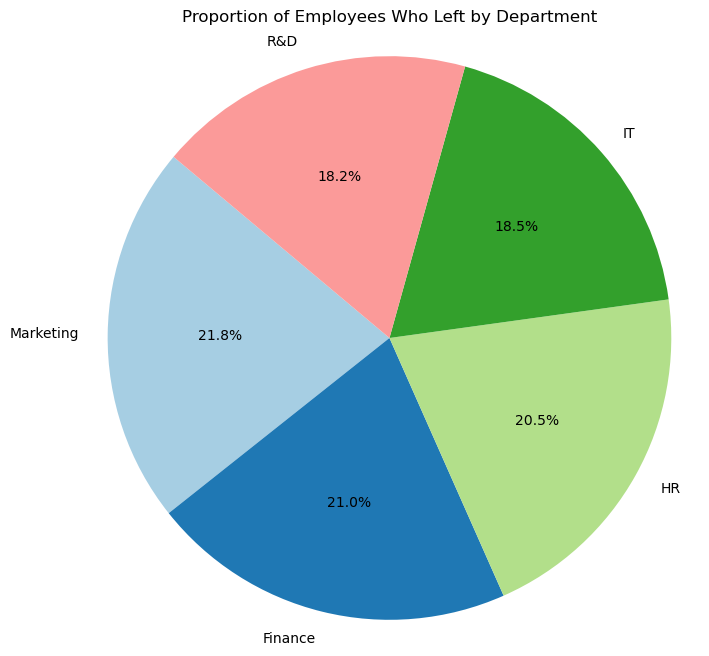

In [96]:
# Filter employees who left
left_df=df[df['left_company']==1]

#Count how many left from each department
left_count=left_df['department'].value_counts()
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(left_count, labels=left_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Employees Who Left by Department')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#### Average Salary by Education Level and Department

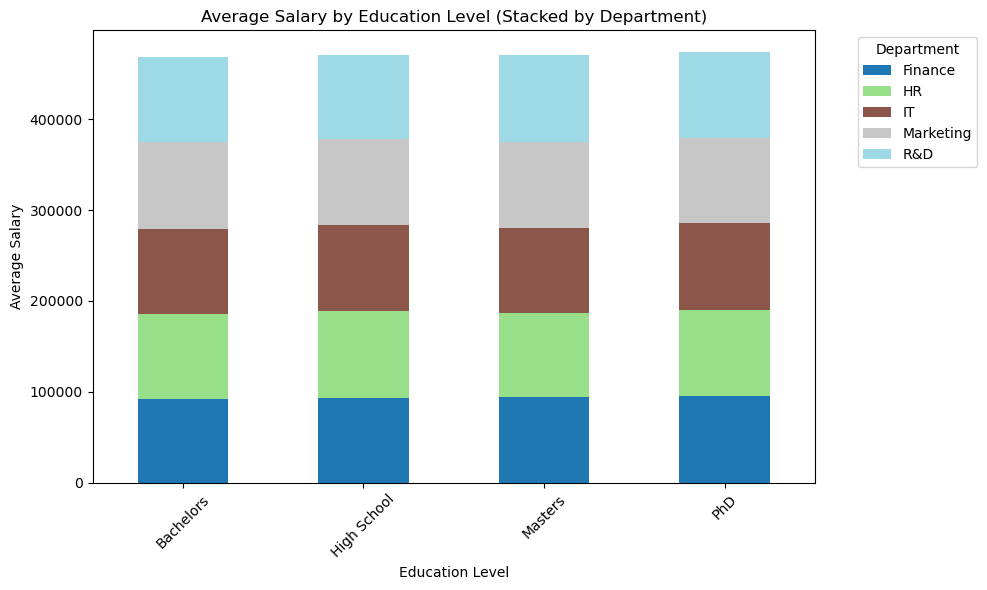

In [97]:
# Group by education level and department, then get average salary
grouped=df.groupby(['education_level','department'])['salary'].mean().unstack(fill_value=0)
# Plot stacked column chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Average Salary by Education Level (Stacked by Department)')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Modeling

##### Applying Multiple Models

Classification Models (for categorical target variables like "Will the employee leave?")

Regression Models (for numeric target variables like "Salary")

Clustering Models (to segment employees into different groups)


1. Classification Models (Predict whether an employee will leave)
Goal: Predict left_company (binary: 0 or 1)

Target variable: left_company (whether employee left)

Features to use: All other columns (e.g., age, salary, education_level, etc.)

In [105]:
#Prepare Data
X=df.drop(columns=['left_company','name','salary_band','position','department','education_level'],errors='ignore')
y=df['left_company']
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#Initialize the model
rf_classifier = RandomForestClassifier()

#train the model
rf_classifier.fit(X_train,y_train)

#Make Predictions
y_pred=rf_classifier.predict(X_test)

#Evaluate the model
print("Classification Report")
print(classification_report(y_pred,y_test))
print("Confusion Matrix")
print(confusion_matrix(y_pred,y_test))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2999
           1       0.00      0.00      0.00         1

    accuracy                           0.85      3000
   macro avg       0.50      0.43      0.46      3000
weighted avg       1.00      0.85      0.92      3000

Confusion Matrix
[[2563  436]
 [   1    0]]
Accuracy: 0.8543333333333333


##### 2. Regression Models (Predict numeric values like Salary)
Goal: Predict salary (numeric value)
Target variable: salary (numeric value)

Features to use: All other columns (e.g., age, education_level, work_life_balance, etc.)

In [107]:
#Prepare the data
X=df.drop(columns=['left_company','name','salary_band','position','department','education_level'],errors='ignore')
y=df['salary']

# Split the data into traning and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#Initialize the model
lr_regressor=LinearRegression()

#Train the model
lr_regressor.fit(X_train,y_train)

# Make Predictions
y_pred=lr_regressor.predict(X_test)

#Evaluate the model
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")

                  

Mean Squared Error: 1.2387856853594142e-22


#### Clustering Models (Segment employees into groups)
Goal: Group employees into clusters based on certain features (e.g., Salary, Job Satisfaction, Age)

Features to use: All features you think will be useful for segmentation, e.g., salary, job_satisfaction, age, etc.

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit and predict on scaled data
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


c:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### STEP 1: Model Evaluation & Comparison
Evaluate the performance of the models using appropriate metrics:

Random Forest Classifier (Classification model): You can use metrics like Accuracy, Precision, Recall, F1-score, and AUC-ROC Curve.

Linear Regression (Regression model): Use metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), R-squared (R²).

KMeans Clustering (Clustering model): Use metrics like Silhouette Score, Inertia (within-cluster sum of squares), or Adjusted Rand Index (ARI) if you have true labels.

#### STEP 2: Feature Importance / Interpretation
This step is about interpreting your models. You can determine which features are important in making predictions.

Random Forest Classifier: Use the .feature_importances_ attribute to see which features are the most influential.

Linear Regression: You can check the coefficients to understand which features contribute to the predictions.

KMeans Clustering: Examine the cluster centers to see which features define the clusters.

In [109]:
import pandas as pd

# For Random Forest Feature Importance
importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})
print("Random Forest Feature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# For Linear Regression Coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_regressor.coef_
})
print("\nLinear Regression Coefficients:")
print(coefficients)

# For KMeans Cluster Centers
print("\nKMeans Cluster Centers:")
print(kmeans.cluster_centers_)


Random Forest Feature Importance:
              Feature  Importance
0                  id    0.191750
7  Standarized_Salary    0.183621
1              salary    0.182015
2                 age    0.140165
3    years_at_company    0.133209
5    job_satisfaction    0.060386
4   work_life_balance    0.056652
6  performance_rating    0.052201

Linear Regression Coefficients:
              Feature   Coefficient
0                  id -5.298288e-16
1              salary  1.000000e+00
2                 age -3.875158e-15
3    years_at_company  9.369598e-15
4   work_life_balance -8.632275e-14
5    job_satisfaction -9.016110e-14
6  performance_rating -2.662776e-15
7  Standarized_Salary  3.139523e-05

KMeans Cluster Centers:
[[5.76106618e+04 4.21975675e+01 2.96202907e+00]
 [1.30984046e+05 4.25523724e+01 2.98925694e+00]
 [9.43337953e+04 4.23782794e+01 3.01830384e+00]]


#### STEP 3: Predictions on New / Unseen Data
Make predictions using the models on new data.

Random Forest Classifier: Use the .predict() method on the test set to get predictions.

Linear Regression: Use the .predict() method to predict continuous outcomes.

KMeans: Predict the cluster to which new data points belong.

In [ ]:
# Random Forest Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Linear Regression Predictions
y_pred_lr = lr_regressor.predict(X_test)



#### STEP 5: Visualization of Model Results
Visualize your model results to better understand performance.

Random Forest: Visualize the confusion matrix and feature importance.

Linear Regression: Plot predicted vs. actual values, or the residuals.

KMeans: Plot the clusters on a 2D graph using PCA or t-SNE if you have high-dimensional data

In [ ]:
# Random Forest Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Linear Regression Predicted vs Actual
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()




In [ ]:
# KMeans Clusters Plot (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_kmeans)
plt.title('KMeans Clusters')
plt.show()

Using different models like Random Forest Classifier, Linear Regression, and KMeans Clustering, the results you get from each of the steps will provide valuable insights in the following ways:

1. Model Evaluation & Comparison:
Random Forest Classifier:

You'll get the accuracy, precision, recall, F1-score, and AUC to evaluate how well the model classifies data (e.g., whether employees left the company or not).

A confusion matrix will show how well the model is performing with true positives, false positives, true negatives, and false negatives.

Linear Regression:

Metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² will show how well the model predicts a continuous outcome (e.g., predicting salary based on other features).

R² will help you understand how much variance in the dependent variable (salary, for example) is explained by the independent variables.

KMeans Clustering:

You'll get the Silhouette Score to evaluate the quality of clusters.

Inertia (within-cluster sum of squares) will tell you how compact your clusters are.

2. Feature Importance / Interpretation:
Random Forest Classifier:

You'll understand which features (e.g., salary, years at the company, job satisfaction) are most important in determining whether an employee leaves or stays.

Linear Regression:

You'll see the coefficients for each feature, which tells you how each feature affects the predicted outcome (e.g., salary or job satisfaction).

KMeans Clustering:

The cluster centers will tell you the average values of features in each cluster, helping you understand the characteristics of each group.

3. Model Optimization (Hyperparameter Tuning):
You'll fine-tune hyperparameters to improve the model's performance:

Random Forest: Optimizing the number of trees (n_estimators), depth (max_depth), and other parameters can improve classification accuracy.

Linear Regression: If using Ridge or Lasso regression, you'll adjust the regularization strength to improve generalization.

KMeans: Using the Elbow Method or Silhouette Score to find the optimal number of clusters will make your clusters more meaningful and reduce model error.
4. Predictions on New / Unseen Data:
You can apply your models to new data and see how well they predict:

Random Forest: Predict whether an employee will leave or stay.

Linear Regression: Predict salary, job satisfaction, or any other continuous value.

KMeans: Predict which cluster a new employee will belong to based on features.

In Brief
Random Forest Classifier: You'll understand how well the model classifies employee turnover, what features influence the predictions, and how to improve it with hyperparameter tuning.

Linear Regression: You'll learn how to predict continuous values like salary or job satisfaction, the relationship between features, and how to make the model better.

KMeans Clustering: You'll group similar employees together and understand the key features that define each group, which could be helpful for segmentation or targeted interventions.

Each of these models gives you different insights. Classification models (like Random Forest) help you predict categories (e.g., will an employee leave), while Regression models (like Linear Regression) help you predict continuous values (e.g., salary). Clustering (like KMeans) helps you group data into similar segments, which is valuable for segmentation and targeted analysis.

By following these steps for all three models, you'll not only build predictive models but also gain insights from feature importance, performance metrics, and predictions, which will help you understand and optimize your data better.

Random Forest Classifier 

Confusion Matrix (Heat Map)

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)


Feature Importance (Bar Plot)


In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', title='Feature Importance (Random Forest)')
plt.show()

Linear Regression:

Actual vs Predicted (Scatter Plot)

In [ ]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

Residual Plot

In [ ]:
residuals = y_test - y_pred_lr
plt.hist(residuals, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.show()

KMeans Clustering:

Cluster Scatter Plot (2D for visualization)

In [ ]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_kmeans)
plt.title("KMeans Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()